<h1>GRAPH GENERATION</h1>

In [30]:
import networkx as nx
import random

# Graph Generators

def generate_random_graph(num_nodes, edge_prob, min_weight=1, max_weight=10):
    """Generate a random graph using the Erdős-Rényi model."""
    graph = nx.erdos_renyi_graph(num_nodes, edge_prob)
    for u, v in graph.edges():
        graph[u][v]['weight'] = random.randint(min_weight, max_weight)
    return graph

def generate_grid_graph(dim_x, dim_y, min_weight=1, max_weight=10):
    """Generate a structured grid graph."""
    graph = nx.grid_2d_graph(dim_x, dim_y)
    graph = nx.convert_node_labels_to_integers(graph)  # Re-label nodes to integers
    for u, v in graph.edges():
        graph[u][v]['weight'] = random.randint(min_weight, max_weight)
    return graph

def generate_bipartite_graph(set1_size, set2_size, edge_prob, min_weight=1, max_weight=10):
    """Generate a random bipartite graph."""
    graph = nx.bipartite.random_graph(set1_size, set2_size, edge_prob)
    for u, v in graph.edges():
        graph[u][v]['weight'] = random.randint(min_weight, max_weight)
    return graph

def generate_real_world_graph():
    """Use a small real-world graph example from NetworkX."""
    # Karate club graph is a real-world network included in NetworkX
    graph = nx.karate_club_graph()
    for u, v in graph.edges():
        graph[u][v]['weight'] = random.randint(1, 10)
    return graph

# Example Usage of the Graph Generators

# if __name__ == "__main__":
#     # Generate graphs
#     random_graph = generate_random_graph(num_nodes=10, edge_prob=0.3)
#     grid_graph = generate_grid_graph(dim_x=3, dim_y=3)
#     bipartite_graph = generate_bipartite_graph(set1_size=5, set2_size=5, edge_prob=0.5)
#     real_world_graph = generate_real_world_graph()

#     # Print summary for each graph
#     graphs = {
#         "Random Graph": random_graph,
#         "Grid Graph": grid_graph,
#         "Bipartite Graph": bipartite_graph,
#         "Real-world Graph": real_world_graph,
#     }

#     for name, graph in graphs.items():
#         print(f"Graph: {name}")
#         print(f"Number of nodes: {graph.number_of_nodes()}")
#         print(f"Number of edges: {graph.number_of_edges()}")
#         print(f"Edge weights: {[data['weight'] for _, _, data in graph.edges(data=True)]}\n")


<h1>GRAPH VISUALIZATION</h1>

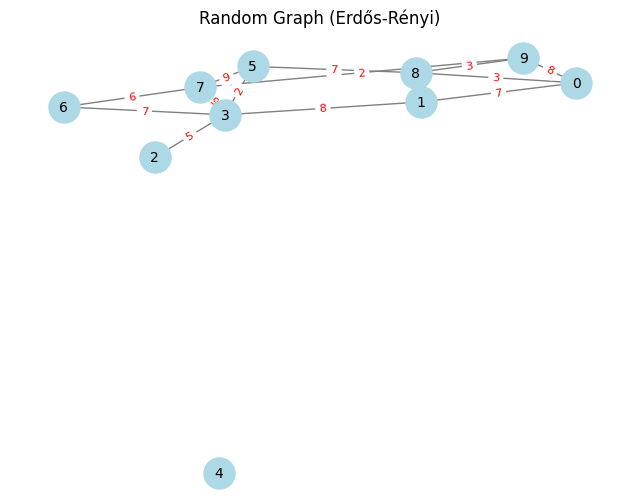

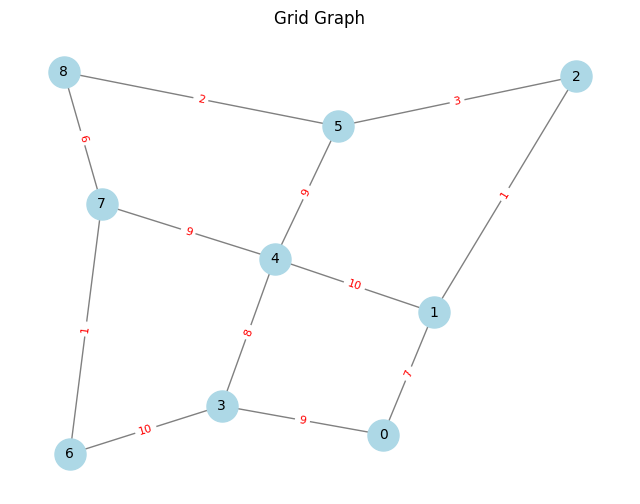

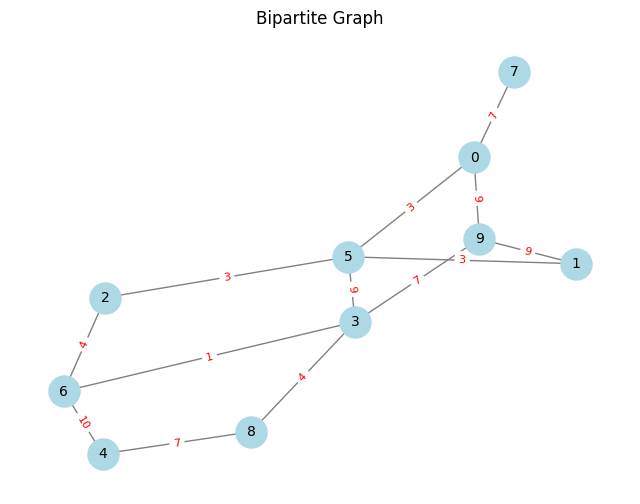

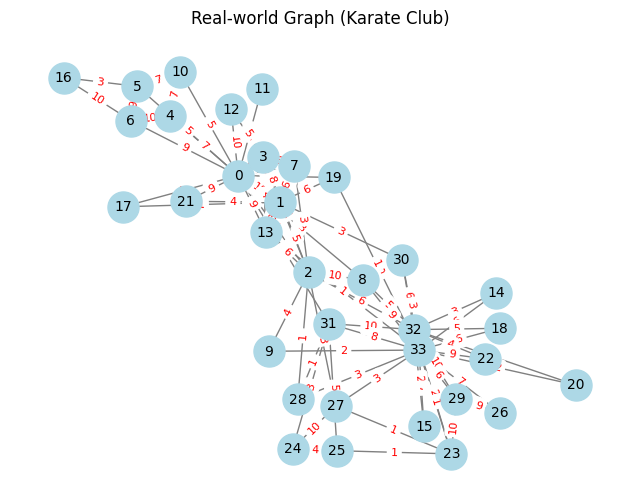

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, title="Graph Visualization"):
    """Visualize a graph with node labels and edge weights."""
    pos = nx.spring_layout(graph)  # Layout for positioning nodes
    plt.figure(figsize=(8, 6))
    plt.title(title)

    # Draw the graph
    nx.draw(graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10)

    # Draw edge weights
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color="red", font_size=8)

    plt.show()

# Example usage with the previously generated graphs
if __name__ == "__main__":
    # Generate graphs
    random_graph = generate_random_graph(num_nodes=10, edge_prob=0.3)
    grid_graph = generate_grid_graph(dim_x=3, dim_y=3)
    bipartite_graph = generate_bipartite_graph(set1_size=5, set2_size=5, edge_prob=0.5)
    real_world_graph = generate_real_world_graph()

    # Visualize each graph
    visualize_graph(random_graph, title="Random Graph (Erdős-Rényi)")
    visualize_graph(grid_graph, title="Grid Graph")
    visualize_graph(bipartite_graph, title="Bipartite Graph")
    visualize_graph(real_world_graph, title="Real-world Graph (Karate Club)")


<h1>baseline algorithms</h1>

In [32]:
import time

# Helper function to calculate the cut value
def calculate_cut_value(graph, partition):
    """Calculate the cut value of a given partition."""
    cut_value = 0
    for u, v, data in graph.edges(data=True):
        if partition[u] != partition[v]:
            cut_value += data.get('weight', 1)
    return cut_value

# Baseline 1: Random Partitioning
def random_partitioning(graph):
    """Randomly assign vertices to two partitions and calculate the cut value."""
    partition = {node: random.choice([0, 1]) for node in graph.nodes}
    cut_value = calculate_cut_value(graph, partition)
    return partition, cut_value

# Baseline 2: Simple Greedy Algorithm
def greedy_partitioning(graph):
    """Start with a random partition and iteratively improve it."""
    partition = {node: random.choice([0, 1]) for node in graph.nodes}
    improved = True

    while improved:
        improved = False
        for node in graph.nodes:
            current_cut_value = calculate_cut_value(graph, partition)
            partition[node] = 1 - partition[node]  # Flip the node's partition
            new_cut_value = calculate_cut_value(graph, partition)
            if new_cut_value > current_cut_value:
                improved = True  # Keep the change if it improves the cut
            else:
                partition[node] = 1 - partition[node]  # Undo the change

    cut_value = calculate_cut_value(graph, partition)
    return partition, cut_value

# # Comparative Experiments
# if __name__ == "__main__":
#     # Generate a sample graph for testing
#     test_graph = generate_random_graph(num_nodes=20, edge_prob=0.4)

#     # Baseline 1: Random Partitioning
#     start_time = time.time()
#     random_partition, random_cut_value = random_partitioning(test_graph)
#     random_runtime = time.time() - start_time

#     # Baseline 2: Greedy Algorithm
#     start_time = time.time()
#     greedy_partition, greedy_cut_value = greedy_partitioning(test_graph)
#     greedy_runtime = time.time() - start_time

#     # Output the results
#     print("Comparative Results:")
#     print("Random Partitioning:")
#     print(f"  Cut Value: {random_cut_value}")
#     print(f"  Runtime: {random_runtime:.6f} seconds\n")

#     print("Greedy Algorithm:")
#     print(f"  Cut Value: {greedy_cut_value}")
#     print(f"  Runtime: {greedy_runtime:.6f} seconds\n")

    # Note: Later compare these with the GRASP + PR results


<h1>Testing on baseline Algorithms</h1>

In [33]:
# Comparative Experiments
if __name__ == "__main__":
    # Generate graphs
    random_graph = generate_random_graph(num_nodes=150, edge_prob=0.4)
    grid_graph = generate_grid_graph(dim_x=15, dim_y=15)  # A 4x4 grid graph
    bipartite_graph = generate_bipartite_graph(set1_size=50, set2_size=50, edge_prob=0.5)
    real_world_graph = generate_real_world_graph()

    # Store graphs for testing
    test_graphs = {
        "Random Graph": random_graph,
        "Grid Graph": grid_graph,
        "Bipartite Graph": bipartite_graph,
        "Real-world Graph": real_world_graph,
    }

    # Run experiments and collect results
    for graph_name, graph in test_graphs.items():
        print(f"Testing on {graph_name}...")

        # Baseline 1: Random Partitioning
        start_time = time.time()
        random_partition, random_cut_value = random_partitioning(graph)
        random_runtime = time.time() - start_time
        print("Random Partitioning:")
        print(f"  Cut Value: {random_cut_value}")
        print(f"  Runtime: {random_runtime:.6f} seconds\n")

        # Baseline 2: Greedy Algorithm
        start_time = time.time()
        greedy_partition, greedy_cut_value = greedy_partitioning(graph)
        greedy_runtime = time.time() - start_time
        print("Greedy Algorithm:")
        print(f"  Cut Value: {greedy_cut_value}")
        print(f"  Runtime: {greedy_runtime:.6f} seconds\n")

        print("="*50)


Testing on Random Graph...
Random Partitioning:
  Cut Value: 12335
  Runtime: 0.004794 seconds

Greedy Algorithm:
  Cut Value: 14291
  Runtime: 2.410090 seconds

Testing on Grid Graph...
Random Partitioning:
  Cut Value: 1062
  Runtime: 0.000612 seconds

Greedy Algorithm:
  Cut Value: 2013
  Runtime: 0.205677 seconds

Testing on Bipartite Graph...
Random Partitioning:
  Cut Value: 3393
  Runtime: 0.000378 seconds

Greedy Algorithm:
  Cut Value: 6930
  Runtime: 0.145469 seconds

Testing on Real-world Graph...
Random Partitioning:
  Cut Value: 186
  Runtime: 0.000051 seconds

Greedy Algorithm:
  Cut Value: 319
  Runtime: 0.002625 seconds



## Goeman Williamson

In [34]:
import numpy as np

def goemans_williamson(adjacency_matrix: np.typing.NDArray[np.uint64]):
    w = adjacency_matrix
    n = w.shape[0]
    d = np.diag(w.sum(axis=1, dtype=np.uint64)).astype(np.uint64)
    l = d - w
    _, eigen_vectors = np.linalg.eigh(l)
    v = eigen_vectors[:, 0]
    r = np.random.randn(n)
    partition = np.sign(v * r)
    s = [i for i in range(n) if partition[i] > 0]
    t = [i for i in range(n) if partition[i] <= 0]

    return s, t

def get_cut_value(
    adjacency_matrix: np.typing.NDArray[np.uint64],
    s: list[int],
    t: list[int]
) -> int:
    cut_value = 0

    for i in s:
        for j in t:
            cut_value += adjacency_matrix[i, j]

    return cut_value

adj_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
], dtype=np.uint64)

if __name__ == "__main__":
    S, T = goemans_williamson(adj_matrix)

    print(f"Set S: {S}")
    print(f"Set T: {T}")
    print(f"Performance: {get_cut_value(adjacency_matrix=adj_matrix, s=S, t=T)}")


Set S: [1]
Set T: [0, 2, 3]
Performance: 3


<h1>GRASP with PATH RELINKING(OUR 1st ALGORITHM)</h1>

In [35]:
import random
import numpy as np
import networkx as nx

# Helper function to calculate the cut value
def calculate_cut_value(graph, partition):
    cut_value = 0
    for u, v, data in graph.edges(data=True):
        if partition[u] != partition[v]:
            cut_value += data.get('weight', 1)
    return cut_value

# Construction phase of GRASP
def construct_initial_solution(graph):
    partition = {node: random.choice([0, 1]) for node in graph.nodes}
    return partition

# Local search phase of GRASP
def local_search(graph, partition):
    improved = True
    while improved:
        improved = False
        for node in graph.nodes:
            current_cut_value = calculate_cut_value(graph, partition)
            partition[node] = 1 - partition[node]  # Flip node's partition
            new_cut_value = calculate_cut_value(graph, partition)
            if new_cut_value > current_cut_value:
                improved = True
            else:
                partition[node] = 1 - partition[node]  # Undo flip if no improvement
    return partition

# Path relinking phase
def path_relinking(graph, solution_a, solution_b):
    best_solution = solution_a.copy()
    best_cut_value = calculate_cut_value(graph, best_solution)

    current_solution = solution_a.copy()
    for node in solution_a:
        if solution_a[node] != solution_b[node]:
            current_solution[node] = solution_b[node]
            current_cut_value = calculate_cut_value(graph, current_solution)
            if current_cut_value > best_cut_value:
                best_solution = current_solution.copy()
                best_cut_value = current_cut_value

    return best_solution

# GRASP with Path Relinking
def grasp_pr(graph, max_iterations, elite_set_size):
    elite_set = []
    best_solution = None
    best_cut_value = -float('inf')

    for iteration in range(max_iterations):
        # GRASP Phase
        initial_solution = construct_initial_solution(graph)
        refined_solution = local_search(graph, initial_solution)

        # Update elite set
        refined_cut_value = calculate_cut_value(graph, refined_solution)
        if len(elite_set) < elite_set_size:
            elite_set.append((refined_solution, refined_cut_value))
        else:
            worst_index = min(range(len(elite_set)), key=lambda i: elite_set[i][1])
            if refined_cut_value > elite_set[worst_index][1]:
                elite_set[worst_index] = (refined_solution, refined_cut_value)

        # Path Relinking Phase
        for elite_solution, _ in elite_set:
            if refined_solution != elite_solution:
                candidate_solution = path_relinking(graph, refined_solution, elite_solution)
                candidate_cut_value = calculate_cut_value(graph, candidate_solution)

                if candidate_cut_value > best_cut_value:
                    best_solution = candidate_solution
                    best_cut_value = candidate_cut_value

    return best_solution, best_cut_value

In [36]:
print(nx.to_numpy_array(generate_random_graph(10,.5),weight='weight'))

[[ 0.  8.  5.  4.  0.  0.  0. 10.  0.  0.]
 [ 8.  0.  0.  4. 10.  0.  9.  0.  6.  8.]
 [ 5.  0.  0.  0. 10.  2.  0.  0.  0.  6.]
 [ 4.  4.  0.  0.  5.  0.  0.  0.  5.  3.]
 [ 0. 10. 10.  5.  0.  0.  0.  1.  8.  4.]
 [ 0.  0.  2.  0.  0.  0.  2.  6.  0.  0.]
 [ 0.  9.  0.  0.  0.  2.  0.  0.  1.  8.]
 [10.  0.  0.  0.  1.  6.  0.  0.  0.  0.]
 [ 0.  6.  0.  5.  8.  0.  1.  0.  0.  0.]
 [ 0.  8.  6.  3.  4.  0.  8.  0.  0.  0.]]


In [37]:
# Comparative Experiments with GRASP + PR
if __name__ == "__main__":
    # Generate graphs
    random_graph = generate_random_graph(num_nodes=50, edge_prob=0.4)
    grid_graph = generate_grid_graph(dim_x=10, dim_y=10)  # A 15x15 grid graph
    bipartite_graph = generate_bipartite_graph(set1_size=35, set2_size=35, edge_prob=0.5)
    real_world_graph = generate_real_world_graph()

    # Store graphs for testing
    test_graphs = {
        "Random Graph": random_graph,
        "Grid Graph": grid_graph,
        "Bipartite Graph": bipartite_graph,
        "Real-world Graph": real_world_graph,
    }

    # Parameters for GRASP + PR
    max_iterations = 50
    elite_set_size = 5

    # Run experiments and collect results
    for graph_name, graph in test_graphs.items():
        print(f"Testing on {graph_name}...")

        # Baseline 1: Random Partitioning
        start_time = time.time()
        random_partition, random_cut_value = random_partitioning(graph)
        random_runtime = time.time() - start_time
        print("Random Partitioning:")
        print(f"  Cut Value: {random_cut_value}")
        print(f"  Runtime: {random_runtime:.6f} seconds\n")

        # Baseline 2: Greedy Algorithm
        start_time = time.time()
        greedy_partition, greedy_cut_value = greedy_partitioning(graph)
        greedy_runtime = time.time() - start_time
        print("Greedy Algorithm:")
        print(f"  Cut Value: {greedy_cut_value}")
        print(f"  Runtime: {greedy_runtime:.6f} seconds\n")

        # Goeman Williamson
        start_time = time.time()
        S, T = goemans_williamson(nx.to_numpy_array(graph,weight='weight'))
        gw_runtime = time.time() - start_time
        print("Goemans Williamson:")
        print(f"  Cut Value: {nx.cut_size(graph, S, T,weight='weight')}")
        print(f"  Runtime: {gw_runtime:.6f} seconds\n")

        print("="*50)

Testing on Random Graph...
Random Partitioning:
  Cut Value: 1152
  Runtime: 0.000123 seconds

Greedy Algorithm:
  Cut Value: 1695
  Runtime: 0.049014 seconds

Goemans Williamson:
  Cut Value: 1362
  Runtime: 0.000643 seconds

Testing on Grid Graph...
Random Partitioning:
  Cut Value: 493
  Runtime: 0.000120 seconds

Greedy Algorithm:
  Cut Value: 823
  Runtime: 0.035277 seconds

Goemans Williamson:
  Cut Value: 425
  Runtime: 0.021644 seconds

Testing on Bipartite Graph...
Random Partitioning:
  Cut Value: 1429
  Runtime: 0.000285 seconds

Greedy Algorithm:
  Cut Value: 3190
  Runtime: 0.087662 seconds

Goemans Williamson:
  Cut Value: 1714
  Runtime: 0.001112 seconds

Testing on Real-world Graph...
Random Partitioning:
  Cut Value: 194
  Runtime: 0.000079 seconds

Greedy Algorithm:
  Cut Value: 309
  Runtime: 0.005219 seconds

Goemans Williamson:
  Cut Value: 184
  Runtime: 0.000471 seconds



Testing on Random Graph...
Results for Random Graph:
  Random Partitioning: Cut Value = 12061, Runtime = 0.002149 seconds
  Greedy Algorithm: Cut Value = 14117, Runtime = 2.168192 seconds
  Goeman Williamson: Cut Value = 12114, Runtime = 0.003773 seconds
Testing on Grid Graph...
Results for Grid Graph:
  Random Partitioning: Cut Value = 1137, Runtime = 0.000298 seconds
  Greedy Algorithm: Cut Value = 2003, Runtime = 0.205897 seconds
  Goeman Williamson: Cut Value = 1099, Runtime = 0.006987 seconds
Testing on Bipartite Graph...
Results for Bipartite Graph:
  Random Partitioning: Cut Value = 3497, Runtime = 0.000469 seconds
  Greedy Algorithm: Cut Value = 6826, Runtime = 0.166837 seconds
  Goeman Williamson: Cut Value = 3154, Runtime = 0.005790 seconds
Testing on Real-world Graph...
Results for Real-world Graph:
  Random Partitioning: Cut Value = 245, Runtime = 0.000063 seconds
  Greedy Algorithm: Cut Value = 304, Runtime = 0.005259 seconds
  Goeman Williamson: Cut Value = 255, Runtime =

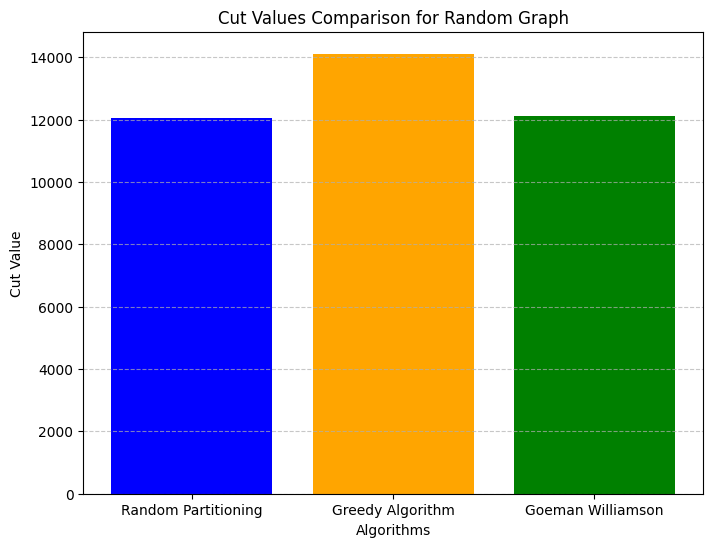

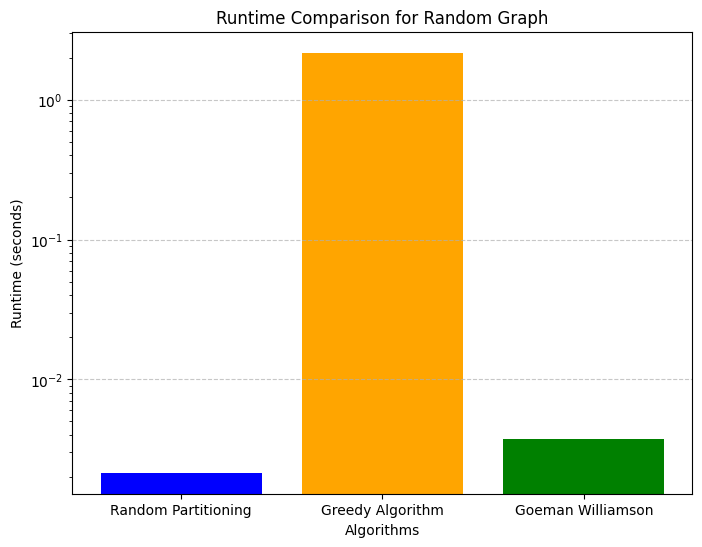

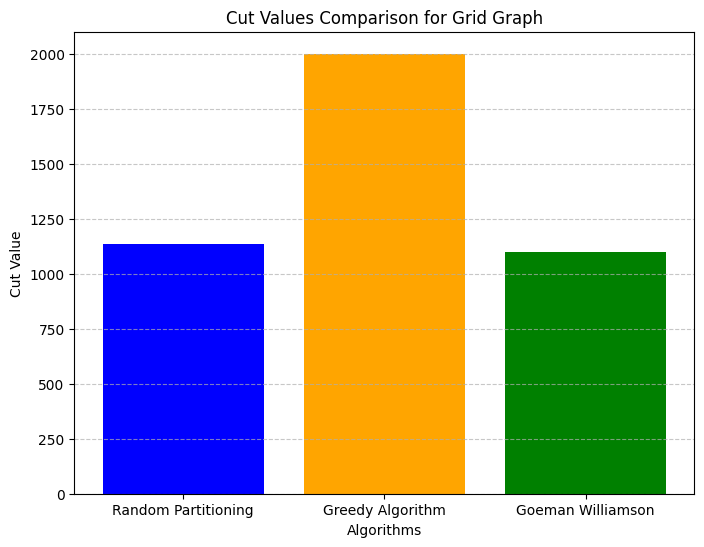

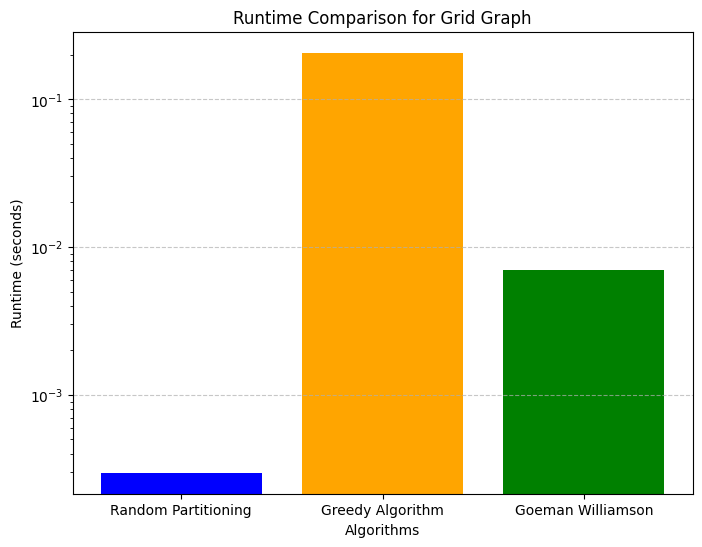

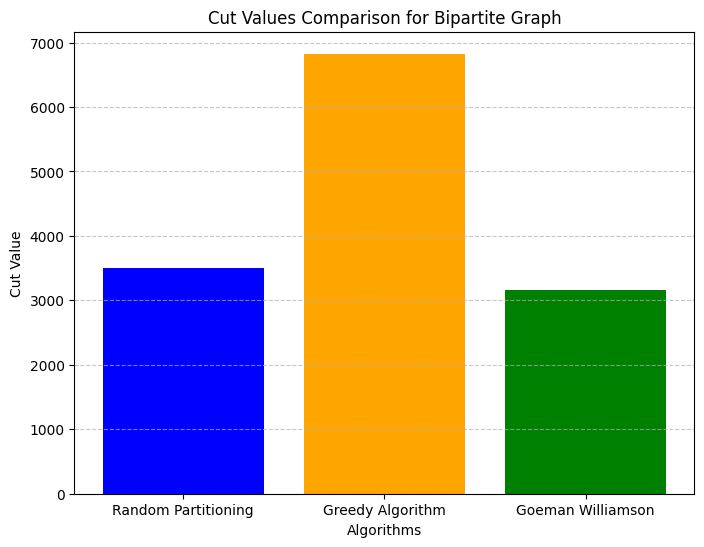

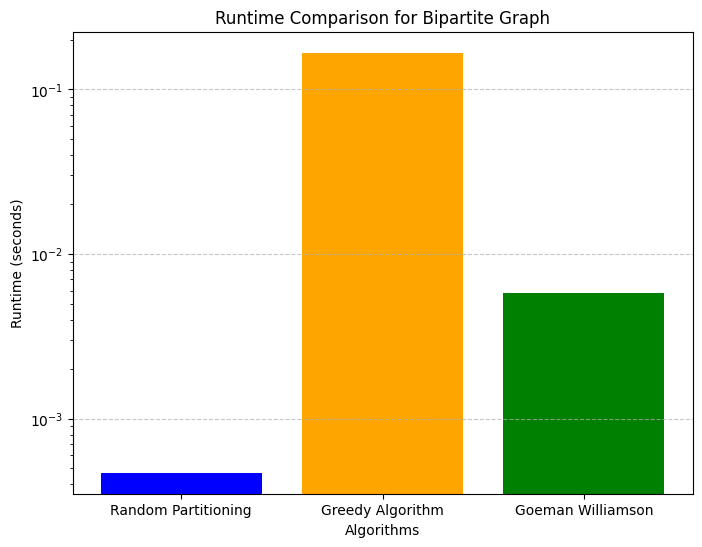

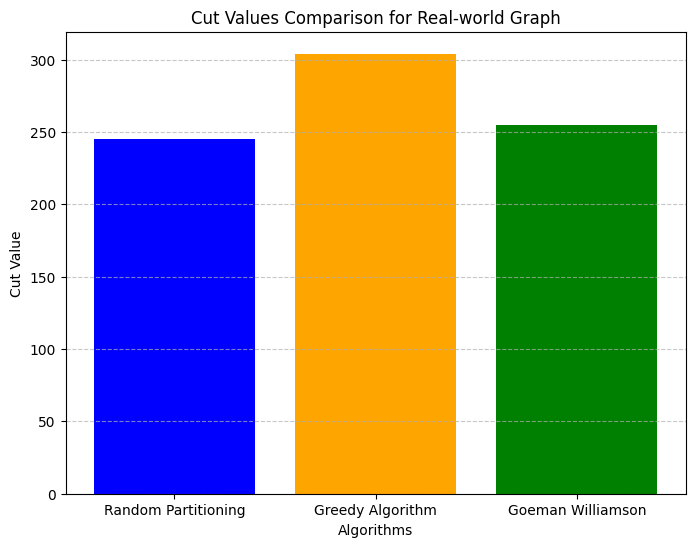

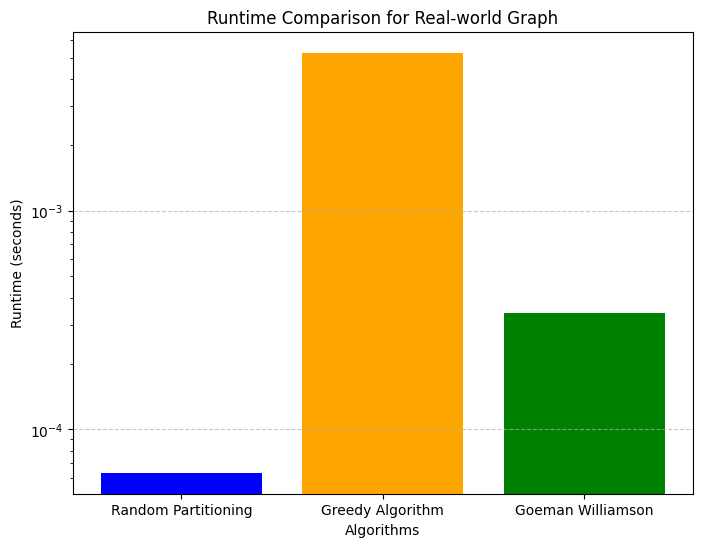

In [38]:
import matplotlib.pyplot as plt
import time

# Function to run experiments and collect results
def run_experiments(test_graphs, max_iterations, elite_set_size):
    """
    Runs the experiments on the provided graphs and collects results.
    
    :param test_graphs: Dictionary of graph names and graphs
    :param max_iterations: Maximum iterations for GRASP + PR
    :param elite_set_size: Elite set size for GRASP + PR
    :return: List of experiment results
    """
    results = []

    for graph_name, graph in test_graphs.items():
        print(f"Testing on {graph_name}...")
        
        # Random Partitioning
        start_time = time.time()
        _, random_cut_value = random_partitioning(graph)
        random_runtime = time.time() - start_time

        # Greedy Algorithm
        start_time = time.time()
        _, greedy_cut_value = greedy_partitioning(graph)
        greedy_runtime = time.time() - start_time
        
        # Goeman Williamson
        start_time = time.time()
        S, T = goemans_williamson(nx.to_numpy_array(graph,weight='weight'))
        gw_runtime = time.time() - start_time
        gw_cut_value = nx.cut_size(graph, S, T,weight='weight')
        # print("Goemans Williamson:")
        # print(f"  Cut Value: {nx.cut_size(graph, S, T,weight='weight')}")
        # print(f"  Runtime: {grasp_runtime:.6f} seconds\n")

        # GRASP + PR
        # start_time = time.time()
        # _, grasp_cut_value = grasp_pr(graph, max_iterations, elite_set_size)
        # grasp_runtime = time.time() - start_time

        # Store results
        results.append({
            "graph": graph_name,
            "cut_values": [random_cut_value, greedy_cut_value, gw_cut_value],
            "runtimes": [random_runtime, greedy_runtime, gw_runtime]
        })

        # Print the results
        print(f"Results for {graph_name}:")
        print(f"  Random Partitioning: Cut Value = {random_cut_value}, Runtime = {random_runtime:.6f} seconds")
        print(f"  Greedy Algorithm: Cut Value = {greedy_cut_value}, Runtime = {greedy_runtime:.6f} seconds")
        print(f"  Goeman Williamson: Cut Value = {gw_cut_value}, Runtime = {gw_runtime:.6f} seconds")
        print("="*50)

    return results

# Visualization function
def visualize_experiment_results(results):
    algorithms = ["Random Partitioning", "Greedy Algorithm", "Goeman Williamson"]

    for result in results:
        graph_name = result["graph"]
        cut_values = result["cut_values"]
        runtimes = result["runtimes"]

        # Plot Cut Values
        plt.figure(figsize=(8, 6))
        plt.bar(algorithms, cut_values, color=["blue", "orange", "green"])
        plt.title(f"Cut Values Comparison for {graph_name}")
        plt.ylabel("Cut Value")
        plt.xlabel("Algorithms")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

        # Plot Runtimes
        plt.figure(figsize=(8, 6))
        plt.bar(algorithms, runtimes, color=["blue", "orange", "green"])
        plt.title(f"Runtime Comparison for {graph_name}")
        plt.ylabel("Runtime (seconds)")
        plt.xlabel("Algorithms")
        plt.yscale("log")  # Log scale for better runtime visualization
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

# Example usage
if __name__ == "__main__":
    # Generate test graphs
    test_graphs = {
        "Random Graph": generate_random_graph(num_nodes=150, edge_prob=0.4),
        "Grid Graph": generate_grid_graph(dim_x=15, dim_y=15),
        "Bipartite Graph": generate_bipartite_graph(set1_size=50, set2_size=50, edge_prob=0.5),
        "Real-world Graph": generate_real_world_graph()
    }

    # Parameters for GRASP + PR
    max_iterations = 50
    elite_set_size = 5

    # Run experiments
    experiment_results = run_experiments(test_graphs, max_iterations, elite_set_size)

    # Visualize results
    visualize_experiment_results(experiment_results)


Testing on Random Graph...
Results for Random Graph:
  Random Partitioning: Avg Cut Value = 12356.1, Avg Runtime = 0.001365 seconds
  Greedy Algorithm: Avg Cut Value = 14482.9, Avg Runtime = 1.787973 seconds
  Goeman Williamson: Avg Cut Value = 12464.4, Avg Runtime = 0.006104 seconds
Testing on Grid Graph...
Results for Grid Graph:
  Random Partitioning: Avg Cut Value = 1109.65, Avg Runtime = 0.000277 seconds
  Greedy Algorithm: Avg Cut Value = 1996.2, Avg Runtime = 0.248494 seconds
  Goeman Williamson: Avg Cut Value = 1119.95, Avg Runtime = 0.014566 seconds
Testing on Bipartite Graph...
Results for Bipartite Graph:
  Random Partitioning: Avg Cut Value = 3516.5, Avg Runtime = 0.000406 seconds
  Greedy Algorithm: Avg Cut Value = 6993.0, Avg Runtime = 0.185082 seconds
  Goeman Williamson: Avg Cut Value = 3534.05, Avg Runtime = 0.002449 seconds
Testing on Real-world Graph...
Results for Real-world Graph:
  Random Partitioning: Avg Cut Value = 212.8, Avg Runtime = 0.000051 seconds
  Greedy

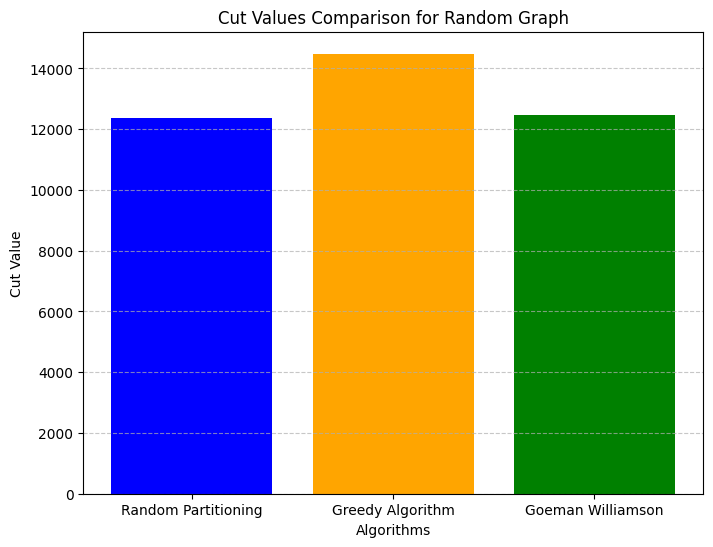

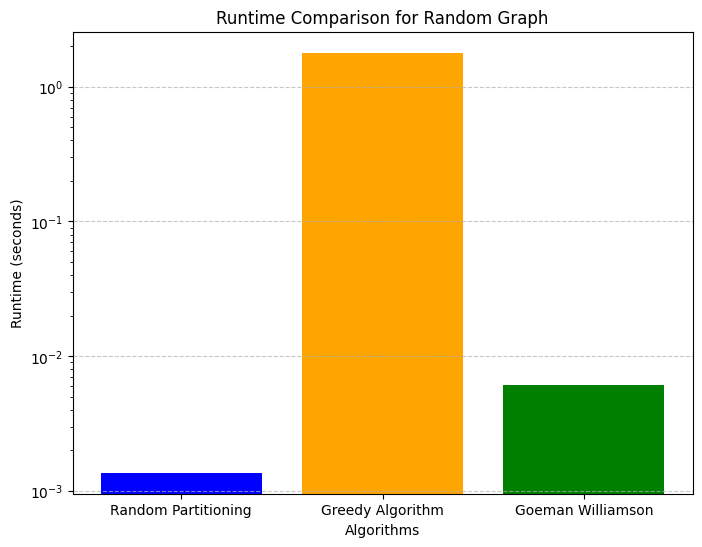

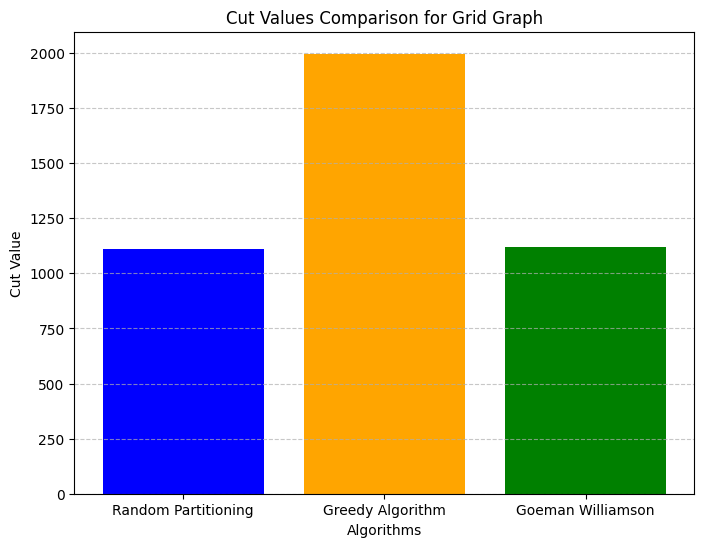

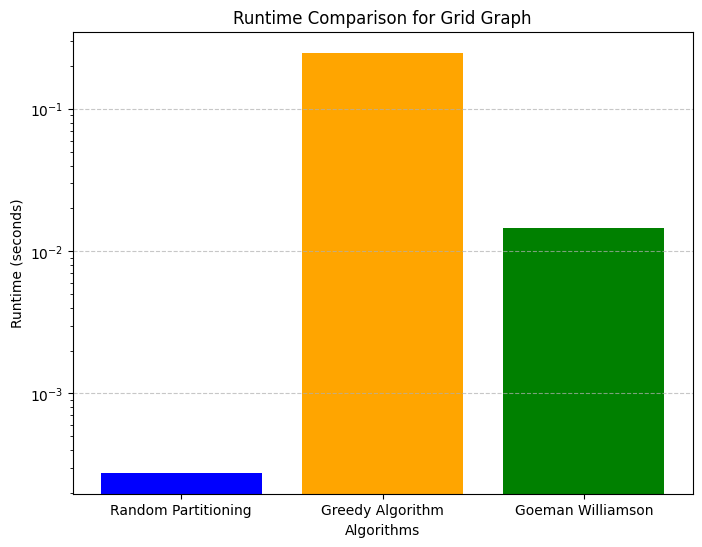

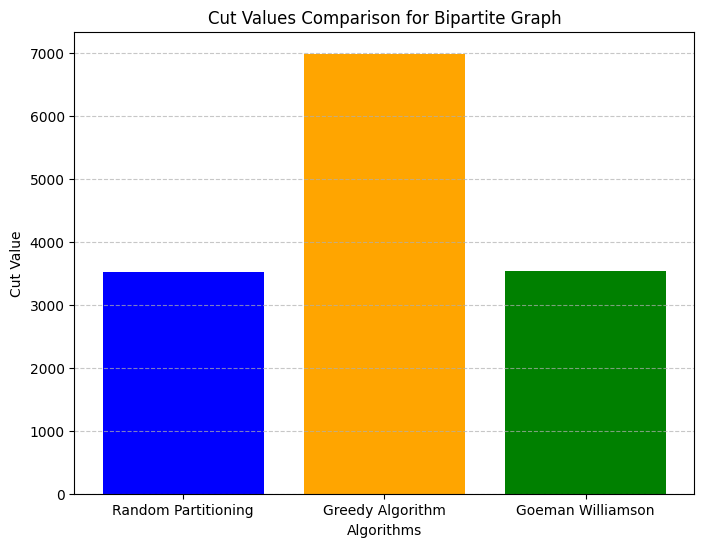

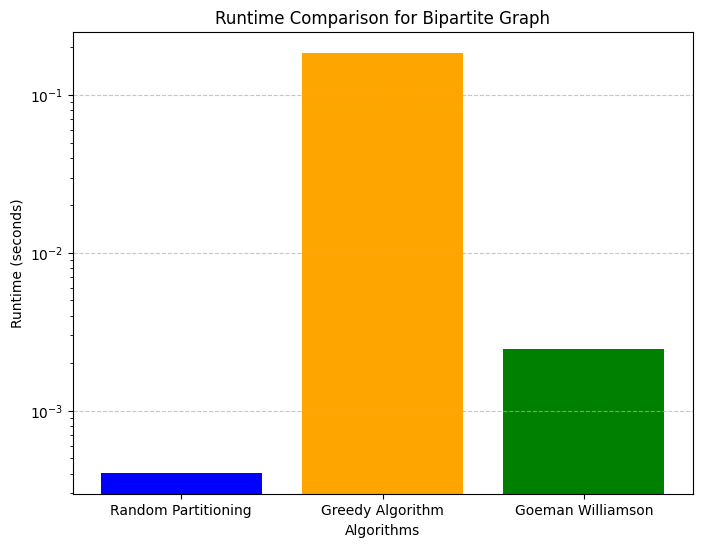

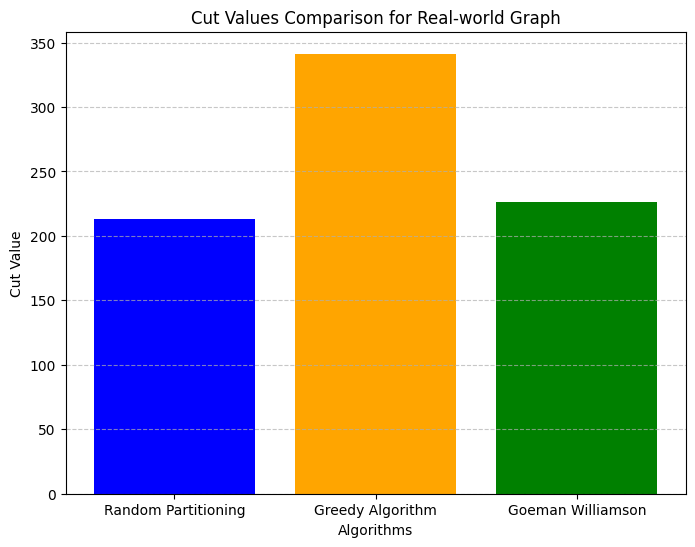

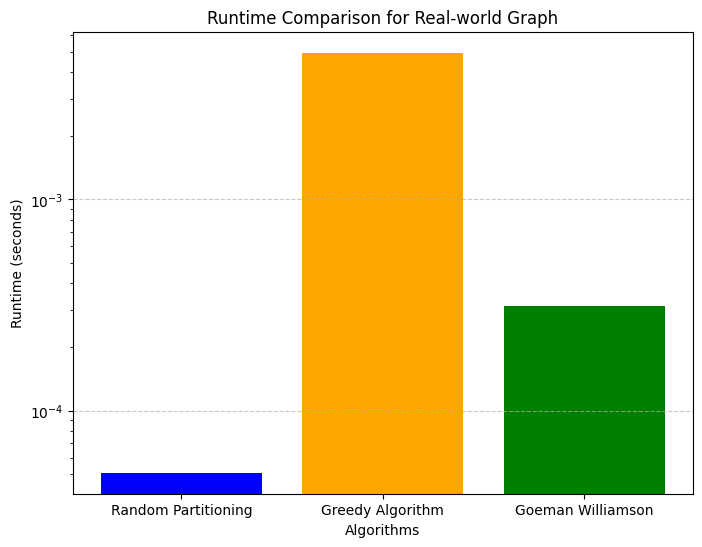

In [39]:
import time
import matplotlib.pyplot as plt
import random

# Function to run experiments and collect results
def run_experiments(test_graphs, max_iterations, elite_set_size, num_runs=10):
    """
    Runs the experiments on the provided graphs and collects results.

    :param test_graphs: Dictionary of graph names and graphs
    :param max_iterations: Maximum iterations for GRASP + PR
    :param elite_set_size: Elite set size for GRASP + PR
    :param num_runs: Number of runs for each experiment (default: 10)
    :return: List of experiment results
    """
    results = []

    for graph_name, graph in test_graphs.items():
        print(f"Testing on {graph_name}...")

        random_cut_values = []
        greedy_cut_values = []
        grasp_cut_values = []
        gw_cut_values = []

        random_runtimes = []
        greedy_runtimes = []
        grasp_runtimes = []
        gw_runtimes = []

        # Run experiments num_runs times
        for _ in range(num_runs):
            # Random Partitioning
            start_time = time.time()
            _, random_cut_value = random_partitioning(graph)
            random_runtime = time.time() - start_time
            random_cut_values.append(random_cut_value)
            random_runtimes.append(random_runtime)

            # Greedy Algorithm
            start_time = time.time()
            _, greedy_cut_value = greedy_partitioning(graph)
            greedy_runtime = time.time() - start_time
            greedy_cut_values.append(greedy_cut_value)
            greedy_runtimes.append(greedy_runtime)
            
            # Goeman Williamson
            start_time = time.time()
            S, T = goemans_williamson(nx.to_numpy_array(graph,weight='weight'))
            gw_runtime = time.time() - start_time
            # print("Goemans Williamson:")
            # print(f"  Cut Value: {nx.cut_size(graph, S, T,weight='weight')}")
            # print(f"  Runtime: {grasp_runtime:.6f} seconds\n")
            
            gw_cut_values.append(nx.cut_size(graph, S, T,weight='weight'))
            gw_runtimes.append(gw_runtime)

            # GRASP + PR
            # start_time = time.time()
            # _, grasp_cut_value = grasp_pr(graph, max_iterations, elite_set_size)
            # grasp_runtime = time.time() - start_time
            # grasp_cut_values.append(grasp_cut_value)
            # grasp_runtimes.append(grasp_runtime)

        # Calculate the average cut values and runtimes
        avg_random_cut_value = sum(random_cut_values) / num_runs
        avg_greedy_cut_value = sum(greedy_cut_values) / num_runs
        avg_gw_cut_value = sum(gw_cut_values) / num_runs

        avg_random_runtime = sum(random_runtimes) / num_runs
        avg_greedy_runtime = sum(greedy_runtimes) / num_runs
        avg_gw_runtime = sum(gw_runtimes) / num_runs

        # Store the average results
        results.append({
            "graph": graph_name,
            "cut_values": [avg_random_cut_value, avg_greedy_cut_value, avg_gw_cut_value],
            "runtimes": [avg_random_runtime, avg_greedy_runtime, avg_gw_runtime]
        })

        # Print the average results for the current graph
        print(f"Results for {graph_name}:")
        print(f"  Random Partitioning: Avg Cut Value = {avg_random_cut_value}, Avg Runtime = {avg_random_runtime:.6f} seconds")
        print(f"  Greedy Algorithm: Avg Cut Value = {avg_greedy_cut_value}, Avg Runtime = {avg_greedy_runtime:.6f} seconds")
        print(f"  Goeman Williamson: Avg Cut Value = {avg_gw_cut_value}, Avg Runtime = {avg_gw_runtime:.6f} seconds")
        print("="*50)

    return results

# Visualization function
def visualize_experiment_results(results):
    algorithms = ["Random Partitioning", "Greedy Algorithm", "Goeman Williamson"]

    for result in results:
        graph_name = result["graph"]
        cut_values = result["cut_values"]
        runtimes = result["runtimes"]

        # Plot Cut Values
        plt.figure(figsize=(8, 6))
        plt.bar(algorithms, cut_values, color=["blue", "orange", "green"])
        plt.title(f"Cut Values Comparison for {graph_name}")
        plt.ylabel("Cut Value")
        plt.xlabel("Algorithms")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

        # Plot Runtimes
        plt.figure(figsize=(8, 6))
        plt.bar(algorithms, runtimes, color=["blue", "orange", "green"])
        plt.title(f"Runtime Comparison for {graph_name}")
        plt.ylabel("Runtime (seconds)")
        plt.xlabel("Algorithms")
        plt.yscale("log")  # Log scale for better runtime visualization
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()
        

# Example usage
if __name__ == "__main__":
    # Generate test graphs
    test_graphs = {
        "Random Graph": generate_random_graph(num_nodes=150, edge_prob=0.4),
        "Grid Graph": generate_grid_graph(dim_x=15, dim_y=15),
        "Bipartite Graph": generate_bipartite_graph(set1_size=50, set2_size=50, edge_prob=0.5),
        "Real-world Graph": generate_real_world_graph()
    }

    # Parameters for GRASP + PR
    max_iterations = 50
    elite_set_size = 5

    # Run experiments
    experiment_results = run_experiments(test_graphs, max_iterations, elite_set_size, num_runs=20)

    # Visualize results
    visualize_experiment_results(experiment_results)


Testing on Random Graph...
Results for Random Graph:
  Random Partitioning: Avg Cut Value = 12490.1, Avg Runtime = 0.001440 seconds
  Greedy Algorithm: Avg Cut Value = 14525.1, Avg Runtime = 1.646389 seconds
  Goeman Williamson: Avg Cut Value = 12521.75, Avg Runtime = 0.020807 seconds
Testing on Grid Graph...
Results for Grid Graph:
  Random Partitioning: Avg Cut Value = 1182.65, Avg Runtime = 0.000272 seconds
  Greedy Algorithm: Avg Cut Value = 2107.35, Avg Runtime = 0.260847 seconds
  Goeman Williamson: Avg Cut Value = 1174.5, Avg Runtime = 0.006665 seconds
Testing on Bipartite Graph...
Results for Bipartite Graph:
  Random Partitioning: Avg Cut Value = 3415.3, Avg Runtime = 0.000383 seconds
  Greedy Algorithm: Avg Cut Value = 6880.0, Avg Runtime = 0.189763 seconds
  Goeman Williamson: Avg Cut Value = 3441.2, Avg Runtime = 0.001800 seconds
Testing on Real-world Graph...
Results for Real-world Graph:
  Random Partitioning: Avg Cut Value = 229.9, Avg Runtime = 0.000051 seconds
  Greedy

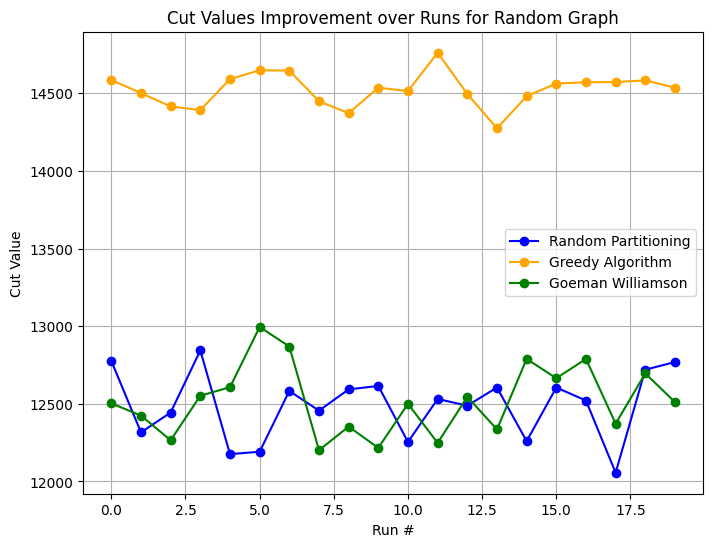

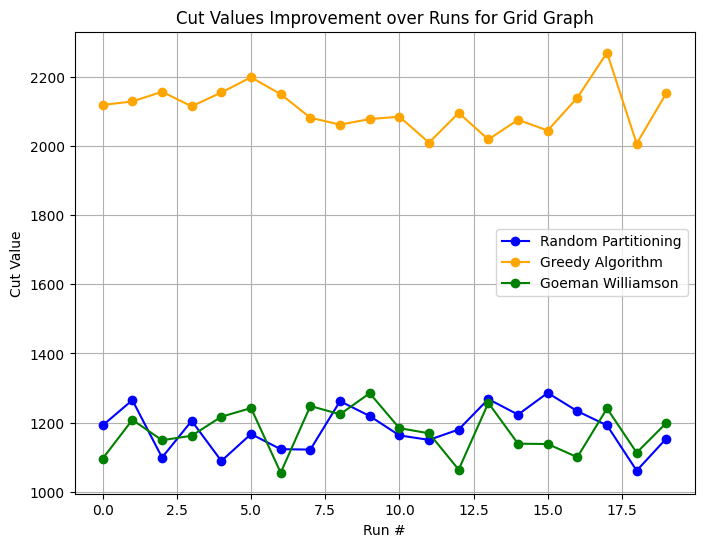

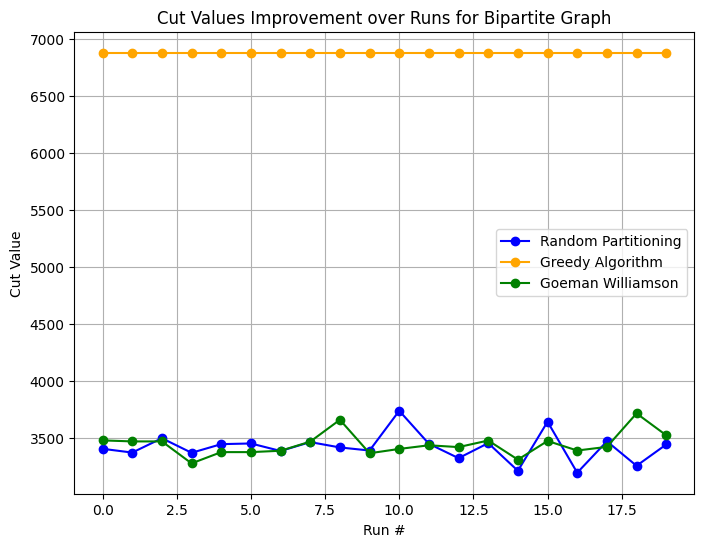

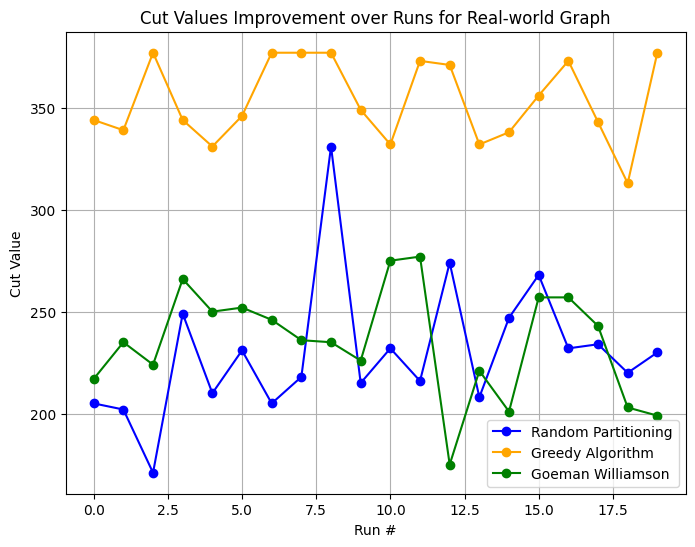

In [40]:
import time
import matplotlib.pyplot as plt
import random

# Function to run experiments and collect results
def run_experiments(test_graphs, max_iterations, elite_set_size, num_runs=10):
    """
    Runs the experiments on the provided graphs and collects results.

    :param test_graphs: Dictionary of graph names and graphs
    :param max_iterations: Maximum iterations for GRASP + PR
    :param elite_set_size: Elite set size for GRASP + PR
    :param num_runs: Number of runs for each experiment (default: 10)
    :return: List of experiment results
    """
    results = []

    for graph_name, graph in test_graphs.items():
        print(f"Testing on {graph_name}...")

        random_cut_values = []
        greedy_cut_values = []
        gw_cut_values = []

        random_runtimes = []
        greedy_runtimes = []
        gw_runtimes = []

        # Store the cut values and runtimes for each run (for improvement visualization)
        random_cut_values_per_run = []
        greedy_cut_values_per_run = []
        gw_cut_values_per_run = []

        random_runtimes_per_run = []
        greedy_runtimes_per_run = []
        gw_runtimes_per_run = []

        # Run experiments num_runs times
        for _ in range(num_runs):
            # Random Partitioning
            start_time = time.time()
            _, random_cut_value = random_partitioning(graph)
            random_runtime = time.time() - start_time
            random_cut_values.append(random_cut_value)
            random_runtimes.append(random_runtime)

            # Store per-run data for improvement visualization
            random_cut_values_per_run.append(random_cut_value)
            random_runtimes_per_run.append(random_runtime)

            # Greedy Algorithm
            start_time = time.time()
            _, greedy_cut_value = greedy_partitioning(graph)
            greedy_runtime = time.time() - start_time
            greedy_cut_values.append(greedy_cut_value)
            greedy_runtimes.append(greedy_runtime)

            # Store per-run data for improvement visualization
            greedy_cut_values_per_run.append(greedy_cut_value)
            greedy_runtimes_per_run.append(greedy_runtime)
            
            # Goeman Williamson
            start_time = time.time()
            S, T = goemans_williamson(nx.to_numpy_array(graph,weight='weight'))
            gw_runtime = time.time() - start_time
            gw_cut_value= nx.cut_size(graph, S, T,weight='weight')
            # print("Goemans Williamson:")
            # print(f"  Cut Value: {nx.cut_size(graph, S, T,weight='weight')}")
            # print(f"  Runtime: {grasp_runtime:.6f} seconds\n")

            # GRASP + PR
            # start_time = time.time()
            # _, grasp_cut_value = grasp_pr(graph, max_iterations, elite_set_size)
            # grasp_runtime = time.time() - start_time
            gw_cut_values.append(gw_cut_value)
            gw_runtimes.append(gw_runtime)

            # Store per-run data for improvement visualization
            gw_cut_values_per_run.append(gw_cut_value)
            gw_runtimes_per_run.append(gw_runtime)

        # Calculate the average cut values and runtimes
        avg_random_cut_value = sum(random_cut_values) / num_runs
        avg_greedy_cut_value = sum(greedy_cut_values) / num_runs
        avg_gw_cut_value = sum(gw_cut_values) / num_runs

        avg_random_runtime = sum(random_runtimes) / num_runs
        avg_greedy_runtime = sum(greedy_runtimes) / num_runs
        avg_gw_runtime = sum(gw_runtimes) / num_runs

        # Store the average results
        results.append({
            "graph": graph_name,
            "cut_values": [avg_random_cut_value, avg_greedy_cut_value, avg_gw_cut_value],
            "runtimes": [avg_random_runtime, avg_greedy_runtime, avg_gw_runtime],
            "random_cut_values_per_run": random_cut_values_per_run,
            "greedy_cut_values_per_run": greedy_cut_values_per_run,
            "gw_cut_values_per_run": gw_cut_values_per_run,
            "random_runtimes_per_run": random_runtimes_per_run,
            "greedy_runtimes_per_run": greedy_runtimes_per_run,
            "gw_runtimes_per_run": gw_runtimes_per_run
        })

        # Print the average results for the current graph
        print(f"Results for {graph_name}:")
        print(f"  Random Partitioning: Avg Cut Value = {avg_random_cut_value}, Avg Runtime = {avg_random_runtime:.6f} seconds")
        print(f"  Greedy Algorithm: Avg Cut Value = {avg_greedy_cut_value}, Avg Runtime = {avg_greedy_runtime:.6f} seconds")
        print(f"  Goeman Williamson: Avg Cut Value = {avg_gw_cut_value}, Avg Runtime = {avg_gw_runtime:.6f} seconds")
        print("="*50)

    return results

# Visualization function
def visualize_experiment_results(results):
    algorithms = ["Random Partitioning", "Greedy Algorithm", "Goeman Williamson"]

    for result in results:
        graph_name = result["graph"]
        cut_values = result["cut_values"]
        runtimes = result["runtimes"]

        # # Plot Cut Values (Average)
        # plt.figure(figsize=(8, 6))
        # plt.bar(algorithms, cut_values, color=["blue", "orange", "green"])
        # plt.title(f"Cut Values Comparison for {graph_name}")
        # plt.ylabel("Cut Value")
        # plt.xlabel("Algorithms")
        # plt.grid(axis="y", linestyle="--", alpha=0.7)
        # plt.show()

        # # Plot Runtimes (Average)
        # plt.figure(figsize=(8, 6))
        # plt.bar(algorithms, runtimes, color=["blue", "orange", "green"])
        # plt.title(f"Runtime Comparison for {graph_name}")
        # plt.ylabel("Runtime (seconds)")
        # plt.xlabel("Algorithms")
        # plt.yscale("log")  # Log scale for better runtime visualization
        # plt.grid(axis="y", linestyle="--", alpha=0.7)
        # plt.show()

        # Improvement over multiple runs: Cut Values
        plt.figure(figsize=(8, 6))
        plt.plot(result["random_cut_values_per_run"], label="Random Partitioning", color="blue", marker='o')
        plt.plot(result["greedy_cut_values_per_run"], label="Greedy Algorithm", color="orange", marker='o')
        plt.plot(result["gw_cut_values_per_run"], label="Goeman Williamson", color="green", marker='o')
        plt.title(f"Cut Values Improvement over Runs for {graph_name}")
        plt.xlabel("Run #")
        plt.ylabel("Cut Value")
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
if __name__ == "__main__":
    # Generate test graphs
    test_graphs = {
        "Random Graph": generate_random_graph(num_nodes=150, edge_prob=0.4),
        "Grid Graph": generate_grid_graph(dim_x=15, dim_y=15),
        "Bipartite Graph": generate_bipartite_graph(set1_size=50, set2_size=50, edge_prob=0.5),
        "Real-world Graph": generate_real_world_graph()
    }

    # Parameters for GRASP + PR
    max_iterations = 50
    elite_set_size = 5

    # Run experiments
    experiment_results = run_experiments(test_graphs, max_iterations, elite_set_size, num_runs=20)

    # Visualize results
    visualize_experiment_results(experiment_results)
